Soal Jurnal
1. Lakukanlah deteksi tepi dengan menggunakan metode Sobel, Prewitt dan Roberts
2. Buatlah method untuk mencari hasil terbaik dari ketiga metode no 1 dengan cara melihat jumlah warna yang diperoleh dari hasil deteksi tepi(Dapat menggunakan if-else statement)

In [525]:
import numpy as np
import math
from PIL import Image
import matplotlib.pyplot as plt
import cv2 as cv

In [526]:
def pad_image(image, filter_size):
    w, h = image.size
    pad_width = filter_size // 2
    padded_image = Image.new('L', (w + pad_width * 2, h + pad_width * 2))
    padded_image.paste(image, (pad_width, pad_width))
    return padded_image


def convolve(image, kernel):
    image = pad_image(image, kernel.shape[0])
    w, h = image.size
    kernel = np.flipud(np.fliplr(kernel)) # flip the kernel
    pixels = image.load()
    output_image = Image.new('L', (w, h))
    output_pixels = output_image.load()

    for i in range(w - kernel.shape[0] + 1):
        for j in range(h - kernel.shape[1] + 1):
            # calculate convolution result for this pixel
            conv = int(np.sum(np.multiply(kernel, np.array([[pixels[x, y] for y in range(j, j + kernel.shape[1])] for x in range(i, i + kernel.shape[0])]))))
            output_pixels[i, j] = conv

    return output_image



def edge_detection(image, filter_choice):
    # define the filters
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])

    # choose the filter
    if filter_choice == 'sobel':
        filter_x, filter_y = sobel_x, sobel_y
    elif filter_choice == 'prewitt':
        filter_x, filter_y = prewitt_x, prewitt_y
    elif filter_choice == 'roberts':
        filter_x, filter_y = roberts_x, roberts_y
    else:
        raise ValueError("Filter choice must be 'sobel', 'prewitt', or 'roberts'")

    # convolve the image with the chosen filter in x and y direction
    convolved_x = convolve(image, filter_x)
    convolved_y = convolve(image, filter_y)

    # compute the gradient magnitude
    gradient_magnitude = Image.new('L', convolved_x.size)
    pixels = gradient_magnitude.load()
    for i in range(gradient_magnitude.size[0]):
        for j in range(gradient_magnitude.size[1]):
            pixels[i, j] = int(math.sqrt(convolved_x.getpixel((i, j))**2 + convolved_y.getpixel((i, j))**2))

    return gradient_magnitude


In [527]:
image = Image.open('./Modul6.png').convert('L')
resized_image = image.resize((250, 500))
sobel = edge_detection(resized_image, 'sobel')
prewitt = edge_detection(resized_image, 'prewitt')
roberts = edge_detection(resized_image, 'roberts')


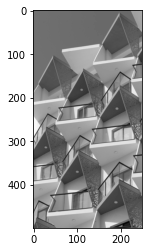

In [528]:
plt.imshow(resized_image,cmap='gray')

In [529]:
# buat melihat gradient
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
roberts_x = np.array([[1, 0], [0, -1]])
roberts_y = np.array([[0, 1], [-1, 0]])
Sx = convolve(resized_image, sobel_x)
Sy = convolve(resized_image, sobel_y)
Px = convolve(resized_image, prewitt_x)
Py = convolve(resized_image, prewitt_y)
Rx = convolve(resized_image, roberts_x)
Ry = convolve(resized_image, roberts_y)

In [ ]:
def showGradient(Gx,Gy,result,tittle):
    Gx = Gx.point(lambda x: 255 if x > 127 else 0, '1')
    Gy = Gy.point(lambda x: 255 if x > 127 else 0, '1')
    plt.figure(figsize=(20,10))
    plt.suptitle('Operasi '+tittle,color = 'black',fontsize=50)
    # plt.subplots_adjust(bottom=0.5)
    plt.subplot(1,3,1) 
    plt.title('Gradient X',color = 'red',fontsize=30)
    plt.imshow(Gx, cmap='gray')
    plt.subplot(1,3,2)
    plt.title('Gradient Y',color = 'green',fontsize=30)
    plt.imshow(Gy, cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Result',color = 'blue',fontsize=30)
    plt.imshow(result, cmap='gray')

In [ ]:
def show(img1,img2,img3):
    plt.figure(figsize=(25,15))
    plt.subplot(1,3,1) 
    plt.title('Operasi Sobel',color = 'red',fontsize=20)
    plt.imshow(img1, cmap='gray')
    plt.subplot(1,3,2)
    plt.title('Operasi Prewitt',color = 'green',fontsize=20)
    plt.imshow(img2, cmap='gray')
    plt.subplot(1,3,3)
    plt.title('Operasi Roberts',color = 'blue',fontsize=20)
    plt.imshow(img3, cmap='gray')

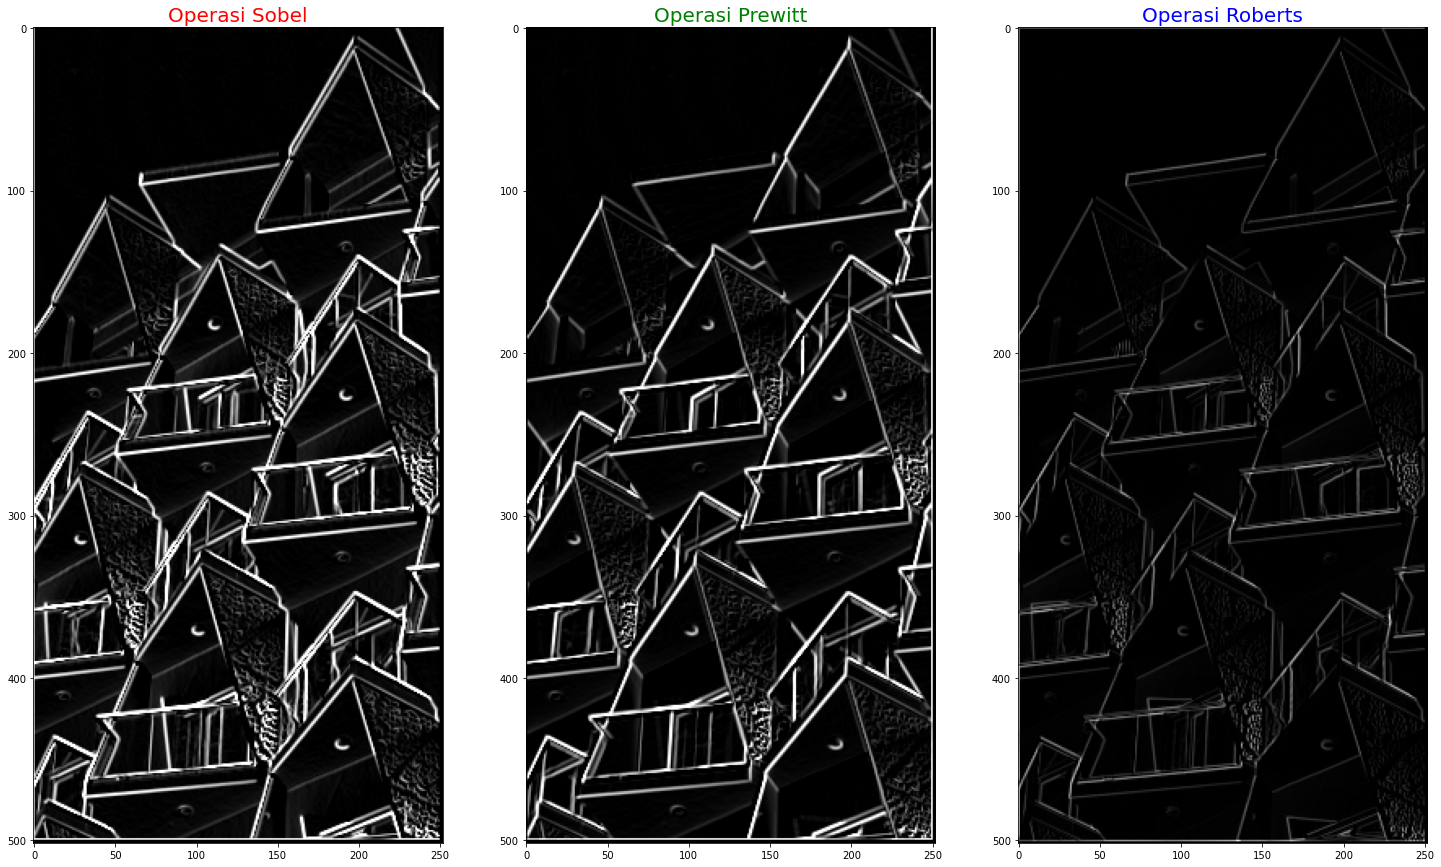

In [ ]:
show(sobel,prewitt,roberts)

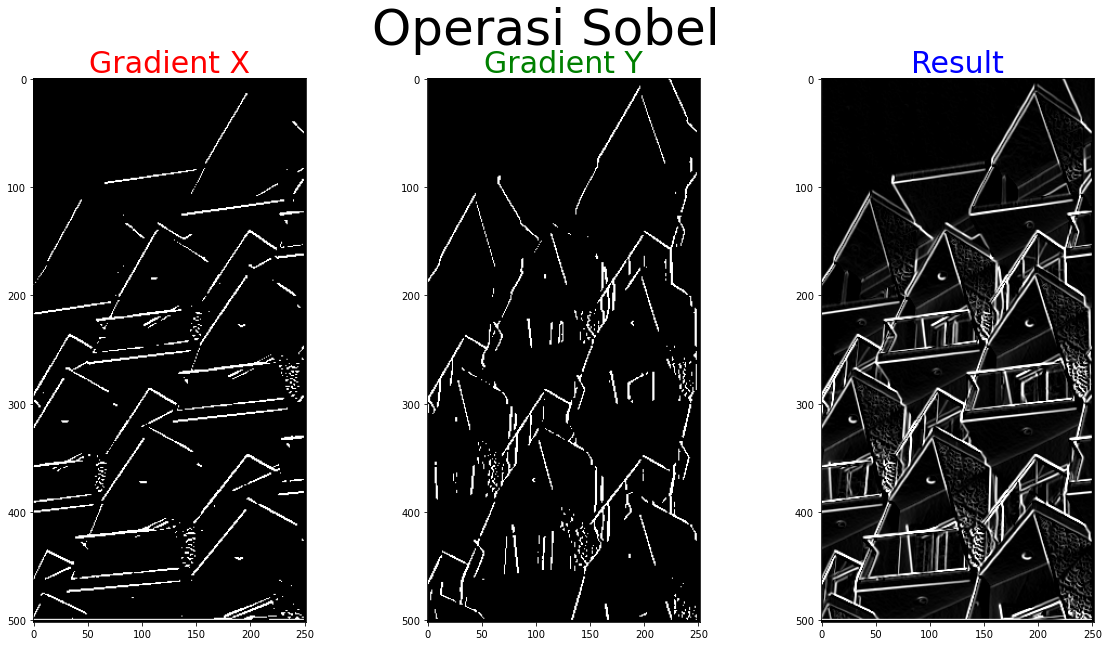

In [ ]:
showGradient(Sx,Sy,sobel,'Sobel')

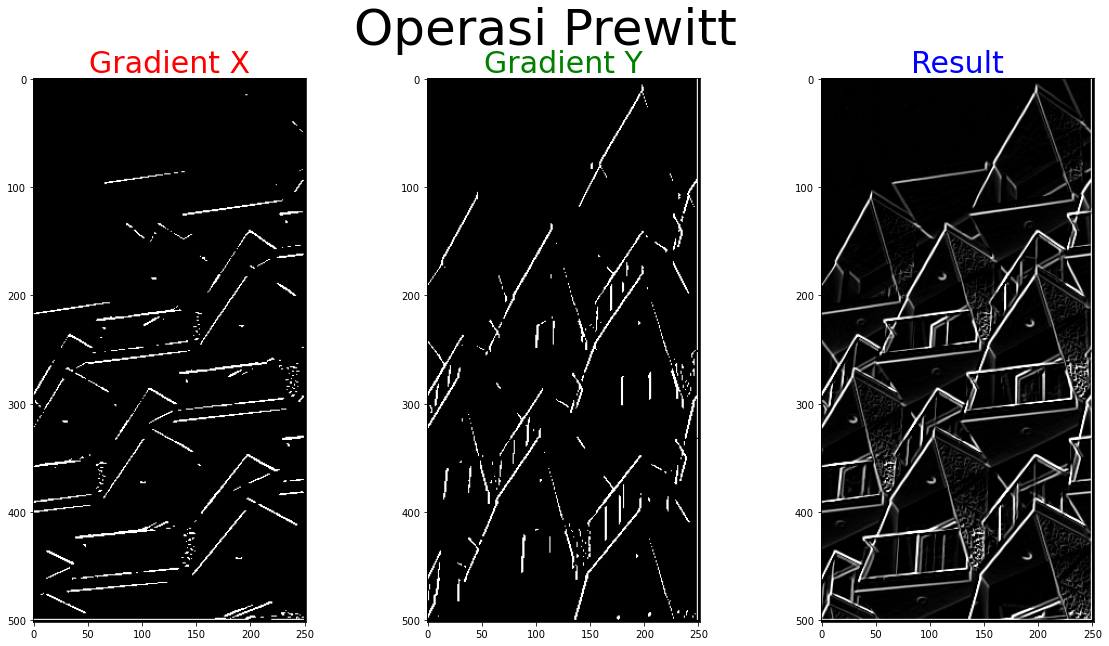

In [ ]:
showGradient(Px,Py,prewitt,'Prewitt')

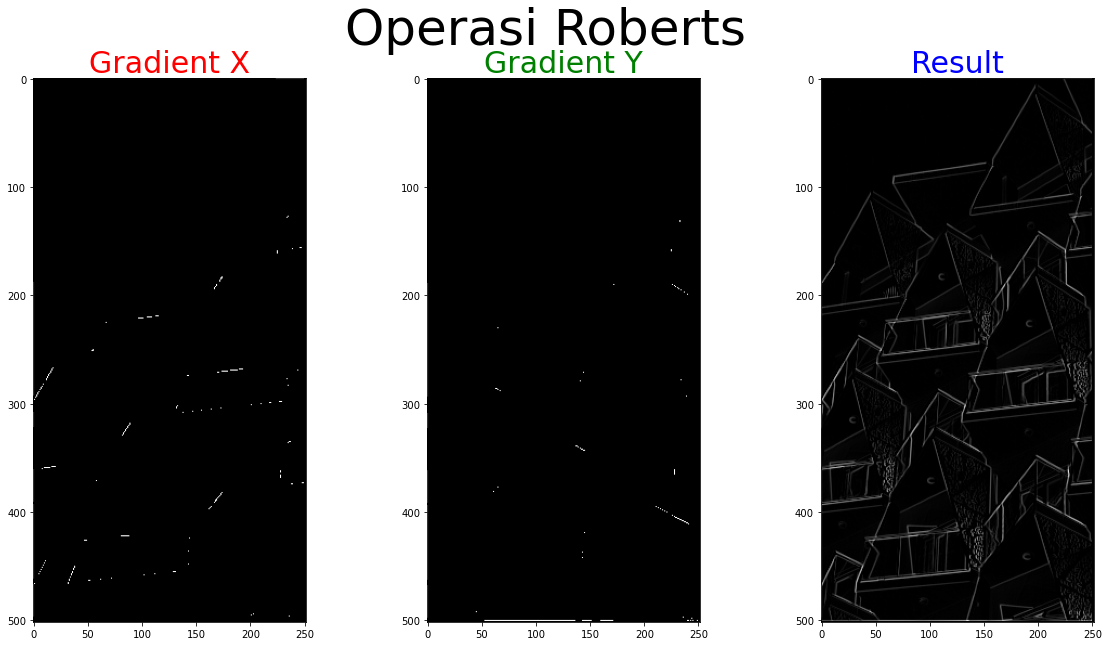

In [ ]:
showGradient(Rx,Ry,roberts,'Roberts')

In [ ]:
#Fungsi untuk menghitung pixel yang menjadi edge
def count_white_pixels(image):
    # Convert image to numpy array
    image_array = np.array(image)
    
    # Count white pixels (255)
    white_pixels = np.sum(image_array != 0)
    
    return white_pixels


In [ ]:
print(count_white_pixels(sobel))
print(count_white_pixels(prewitt))
print(count_white_pixels(roberts))

90990
76995
75070


In [ ]:
def FindBestMethod(sobel,prewitt,roberts):
    sobel = np.int32(count_white_pixels(sobel))
    prewitt = np.int32(count_white_pixels(prewitt))
    roberts = np.int32(count_white_pixels(roberts))
    if sobel > prewitt and sobel > roberts:
        print("Metode Sobel mendeteksi tepi lebih baik dari metode lainnya")
    elif prewitt > sobel and prewitt > roberts:
        print("Metode Prewitt mendeteksi tepi lebih baik dari metode lainnya")
    else:
        print("Metode Roberts mendeteksi tepi lebih baik dari metode lainnya")


In [ ]:
FindBestMethod(sobel,prewitt,roberts)

Metode Sobel mendeteksi tepi lebih baik dari metode lainnya
